# 'Kwanza Tukule' Sales Data Analysis and Insights.
*By Muniu Paul ™️*

## 1. Business Understanding.
### Overview.
Kwanza Tukule is a cashless B2B business that leverages technology and an efficient supply chain to ensure accessible and affordable nutritious food for the many in Kenya. By focusing on street food vendors and kiosks, which serve as critical food access points in low-income areas, Kwanza Tukule addresses the challenges of affordability and availability of ingredients. The company sources essential products directly from manufacturers and delivers them through last-mile distribution, cutting out intermediaries and offering products at affordable rates to vendors, thus reducing food costs for the local population.

### Problem Statement.
This project aims to analyze anonymized sales data to derive actionable insights that will help Kwanza Tukule optimize its operations, better serve its vendors, and improve access to affordable food. The insights will focus on understanding sales trends, customer behavior, and inventory management to inform business decisions.

### Objectives.
1. Data Cleaning and Preparation: Cleaning and preparing the dataset.
2. Sales Analysis: Analyzing trends and performance to understand the business context.
3. Forecasting and Segmentation: Performing advanced analysis like forecasting and customer segmentation.
4. Recommendations: Providing actionable recommendations to improve operations.
5. Dashboard Creation: Creating an interactive dashboard that summarizes your findings.

### Stakeholder : 
**Kwanza Tukule Foods Limited** - A B2B company focused on providing accessible, affordable, and nutritious food to street food vendors and kiosks in low-income areas of Kenya.

# 2. Data Understanding.
The dataset provided by **Kwanza Tukule** contains anonymized sales data. You can access it [here](dataset/Case%20Study%20Data%20-%20Read%20Only%20-%20case_study_data_2025-01-16T06_49_12.19881Z.csv).

##### Importing packages/libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from tabulate import tabulate

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# View the first 5 rows
data = pd.read_csv('dataset/Case Study Data.csv')
data.head()

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE
0,"August 18, 2024, 9:32 PM",Category-106,Product-21f4,Business-de42,Location-1ba8,1,850
1,"August 18, 2024, 9:32 PM",Category-120,Product-4156,Business-de42,Location-1ba8,2,"1,910"
2,"August 18, 2024, 9:32 PM",Category-121,Product-49bd,Business-de42,Location-1ba8,1,"3,670"
3,"August 18, 2024, 9:32 PM",Category-76,Product-61dd,Business-de42,Location-1ba8,1,"2,605"
4,"August 18, 2024, 9:32 PM",Category-119,Product-66e0,Business-de42,Location-1ba8,5,"1,480"


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333405 entries, 0 to 333404
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   DATE                 333405 non-null  object
 1   ANONYMIZED CATEGORY  333405 non-null  object
 2   ANONYMIZED PRODUCT   333405 non-null  object
 3   ANONYMIZED BUSINESS  333405 non-null  object
 4   ANONYMIZED LOCATION  333405 non-null  object
 5   QUANTITY             333405 non-null  int64 
 6   UNIT PRICE           333397 non-null  object
dtypes: int64(1), object(6)
memory usage: 17.8+ MB


The dataset consists of 333,405 rows and 7 columns. The features include:

`DATE`: The date of the transaction.

`ANONYMIZED CATEGORY`: The category of the product sold.

`ANONYMIZED PRODUCT`: The specific product that was sold.

`ANONYMIZED BUSINESS`: The business that made the sale.

`ANONYMIZED LOCATION`: The location of the transaction.

`QUANTITY`: The number of units sold in the transaction.

`UNIT PRICE`: The price per unit of the product.

# SECTION 1: Data Cleaning and Preparation.

### (a) Data Quality Assessment.

#### i. Check for Missing values

In [4]:
missing_values = data.isnull().sum()
missing_values

DATE                   0
ANONYMIZED CATEGORY    0
ANONYMIZED PRODUCT     0
ANONYMIZED BUSINESS    0
ANONYMIZED LOCATION    0
QUANTITY               0
UNIT PRICE             8
dtype: int64

**Action Taken :** 
- Given that the rest of the dataset had no missing values, I decided to drop the rows with missing values in the 'UNIT PRICE' column to avoid introducing bias into the analysis.

In [5]:
data.dropna(subset=['UNIT PRICE'], inplace=True)

In [6]:
# Verify that no missing values have remained
missing_values_after = data.isnull().sum()
missing_values_after

DATE                   0
ANONYMIZED CATEGORY    0
ANONYMIZED PRODUCT     0
ANONYMIZED BUSINESS    0
ANONYMIZED LOCATION    0
QUANTITY               0
UNIT PRICE             0
dtype: int64

#### ii. Check Dublicates

In [7]:
data.duplicated().sum()

3524

**Action Taken :**
- Discovered that 3,524 
duplicate rows are present. Duplicate rows can skew analysis and lead to inaccurate insights, so it was essential to address this issue by dropping them.

In [8]:
# dropping duplicates
data.drop_duplicates(inplace=True)

In [9]:
# counter-check duplicates
data.duplicated().sum()

0

### iii. check for inconsistent data types.

In [10]:
# check for datatypes
data.dtypes

DATE                   object
ANONYMIZED CATEGORY    object
ANONYMIZED PRODUCT     object
ANONYMIZED BUSINESS    object
ANONYMIZED LOCATION    object
QUANTITY                int64
UNIT PRICE             object
dtype: object

**Action Taken**
- Upon inspecting the data types:
The DATE column is stored as an object, ought be converted to a datetime format and the UNIT PRICE column is stored as an object this needs to be converted to a numeric format (float).

In [11]:
# convert the date column to datetime
data['DATE'] = pd.to_datetime(data['DATE'], errors='coerce')

# convert the Unit Price column to float dtype
data['UNIT PRICE'] = data['UNIT PRICE'].str.replace("," , "").astype(float)

### (b) Feature Engineering.
##### i. Creating the "Month-Year" Column.
This part involves creating a new column called Month-Year. We'll extract the month and year from the DATE column.

In [13]:
# Create 'Month-Year' column
data['Month-Year'] = data['DATE'].dt.strftime('%B %Y')

In [14]:
# Check the new column
data.head(3)

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE,Month-Year
0,2024-08-18 21:32:00,Category-106,Product-21f4,Business-de42,Location-1ba8,1,850.0,August 2024
1,2024-08-18 21:32:00,Category-120,Product-4156,Business-de42,Location-1ba8,2,1910.0,August 2024
2,2024-08-18 21:32:00,Category-121,Product-49bd,Business-de42,Location-1ba8,1,3670.0,August 2024


### (c) Data Validation.
*-* This process involves verifying if the data values make sense within the project's context. Essentially, it involves whether the data meets specific criteria before it is used.

##### i. Outliers Detection
*-* Used boxplots and summary statistics to identify unusually high or low values.

In [15]:
data.describe()

,DATE,QUANTITY,UNIT PRICE
count,329873,329873.000000,329873.000000
mean,2024-07-18 11:47:54.002236672,2.321469,2319.016579
min,2024-01-01 05:54:00,0.000000,0.000000
25%,2024-04-30 16:34:00,1.000000,1420.000000
50%,2024-07-29 18:40:00,1.000000,1840.000000
75%,2024-10-14 21:32:00,2.000000,2750.000000
max,2024-12-31 18:24:00,359.000000,16136.000000
std,NaN,3.767697,1582.578700


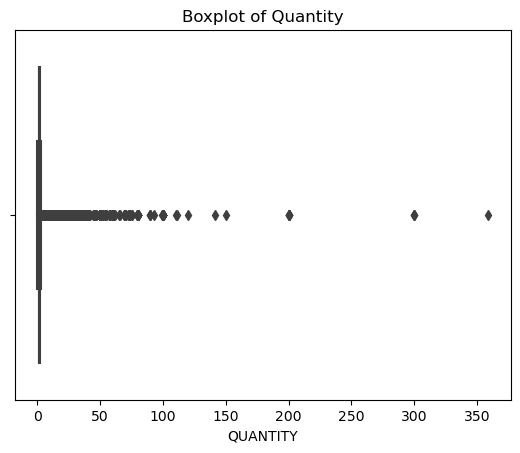

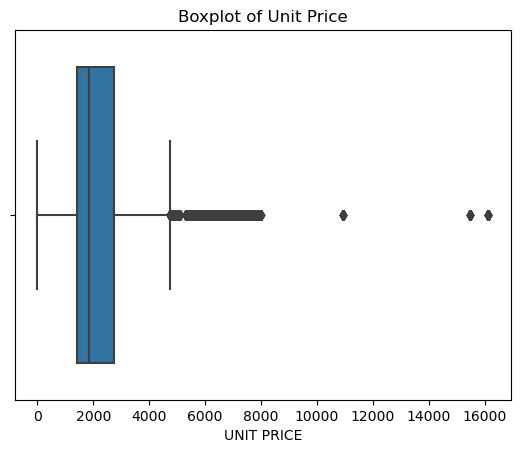

In [16]:

# Check for outliers in QUANTITY
sns.boxplot(x=data['QUANTITY'])
plt.title('Boxplot of Quantity')
plt.show()

# Check for outliers in UNIT PRICE
sns.boxplot(x=data['UNIT PRICE'])
plt.title('Boxplot of Unit Price')
plt.show()

**Action Taken :**  
- No outliers were removed, as they represent valid observations and provide valuable insights into the dataset's range and variability.

##### ii. Date Validation  
*-* Verifying the DATE column has valid entries and ensure they all fall within a reasonable range.

In [17]:
# Check for invalid dates
print(f"Min date: {data['DATE'].min()}, Max date: {data['DATE'].max()}")

Min date: 2024-01-01 05:54:00, Max date: 2024-12-31 18:24:00


##### iii. Consistency in Categorical Data
*-* To ensure consistency across the dataset, we created a function that standardizes specified columns by removing extra spaces and converting text to lowercase. This is applied to the following columns: 

&#10003; ANONYMIZED CATEGORY 

&#10003; ANONYMIZED PRODUCT 

&#10003; ANONYMIZED BUSINESS

&#10003; ANONYMIZED LOCATION

In [18]:
def clean_column(df, columns):
    """
    Cleans and standardizes specified columns in a DataFrame.
    """
    for col in columns:
        df[col] = df[col].str.strip().str.lower()
    return df

columns_to_clean = ['ANONYMIZED CATEGORY', 'ANONYMIZED PRODUCT', 'ANONYMIZED BUSINESS', 'ANONYMIZED LOCATION']
df = clean_column(data, columns_to_clean)
data.head(3)

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE,Month-Year
0,2024-08-18 21:32:00,category-106,product-21f4,business-de42,location-1ba8,1,850.0,August 2024
1,2024-08-18 21:32:00,category-120,product-4156,business-de42,location-1ba8,2,1910.0,August 2024


In [ ]:
# Setting a custom format
pd.set_option('display.float_format', '{:,.2f}'.format)

# re-confirming for missing values, duplcates and datatypes
print(f"{data.isnull().sum()}\n")
print(f"DUPLICATES = {data.duplicated().sum()}\n")
print(f"***DATA TYPES***\n{data.dtypes}")


DATE                   0
ANONYMIZED CATEGORY    0
ANONYMIZED PRODUCT     0
ANONYMIZED BUSINESS    0
ANONYMIZED LOCATION    0
QUANTITY               0
UNIT PRICE             0
Month-Year             0
dtype: int64

DUPLICATES = 0

***DATA TYPES***
DATE                   datetime64[ns]
ANONYMIZED CATEGORY            object
ANONYMIZED PRODUCT             object
ANONYMIZED BUSINESS            object
ANONYMIZED LOCATION            object
QUANTITY                        int64
UNIT PRICE                    float64
Month-Year                     object
dtype: object


In [20]:
data.sample(5, random_state=42)

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE,Month-Year
72578,2024-05-27 13:57:00,category-78,product-b409,business-c96d,location-d32a,1,750.0,May 2024
59770,2024-04-25 16:36:00,category-75,product-23fd,business-2590,location-0451,1,4078.0,April 2024
160669,2024-07-16 20:41:00,category-119,product-66e0,business-fe3d,location-1ba8,2,1380.0,July 2024
123576,2024-10-10 17:20:00,category-119,product-e98d,business-4d9c,location-689f,1,1450.0,October 2024
90984,2024-10-06 21:54:00,category-76,product-e805,business-bc52,location-3fc0,2,5300.0,October 2024


> Done performing data cleaning, our dataset is now well-prepared for analysis.

# SECTION 2: Exploratory Data Analysis.

### (a) Sales Overview

**i. Total Quantity and Value grouped by: Anonymized Category and Anonymized Business.**

In [22]:
# calculating the Value column(Value = Quantity × Unit Price)
data["VALUE"] = data["QUANTITY"] * data["UNIT PRICE"]
data.head(2)

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE,Month-Year,VALUE
0,2024-08-18 21:32:00,category-106,product-21f4,business-de42,location-1ba8,1,850.0,August 2024,850.0
1,2024-08-18 21:32:00,category-120,product-4156,business-de42,location-1ba8,2,1910.0,August 2024,3820.0


In [31]:
# Group by Anonymized Category
category_group = data.groupby('ANONYMIZED CATEGORY').agg({
    'QUANTITY': 'sum', 'VALUE': 'sum'}).reset_index()

# Group by Anonymized Business
business_group = data.groupby('ANONYMIZED BUSINESS').agg({
    'QUANTITY': 'sum', 'VALUE': 'sum'}).reset_index()

In [32]:
# view the category_group
print(f'Category_group_shape: {category_group.shape}')
category_group.head(5)

Category_group_shape: (46, 3)


,ANONYMIZED CATEGORY,QUANTITY,VALUE
0,category-100,76824,"134,902,751.00"
1,category-101,19564,"35,577,822.00"
2,category-102,1786,"464,463.00"
3,category-104,1217,"1,557,598.00"
4,category-105,1579,"2,690,719.00"


In [33]:
# view the business_group
print(f'Business_group_shape: {business_group.shape}')
business_group.head(5)

Business_group_shape: (4800, 3)


,ANONYMIZED BUSINESS,QUANTITY,VALUE
0,business-0000,8,"10,445.00"
1,business-0005,1,"2,645.00"
2,business-0029,26,"77,340.00"
3,business-003d,98,"221,761.00"
4,business-0072,127,"225,056.00"


**ii. Visuals for the above findings.**

- Category Group

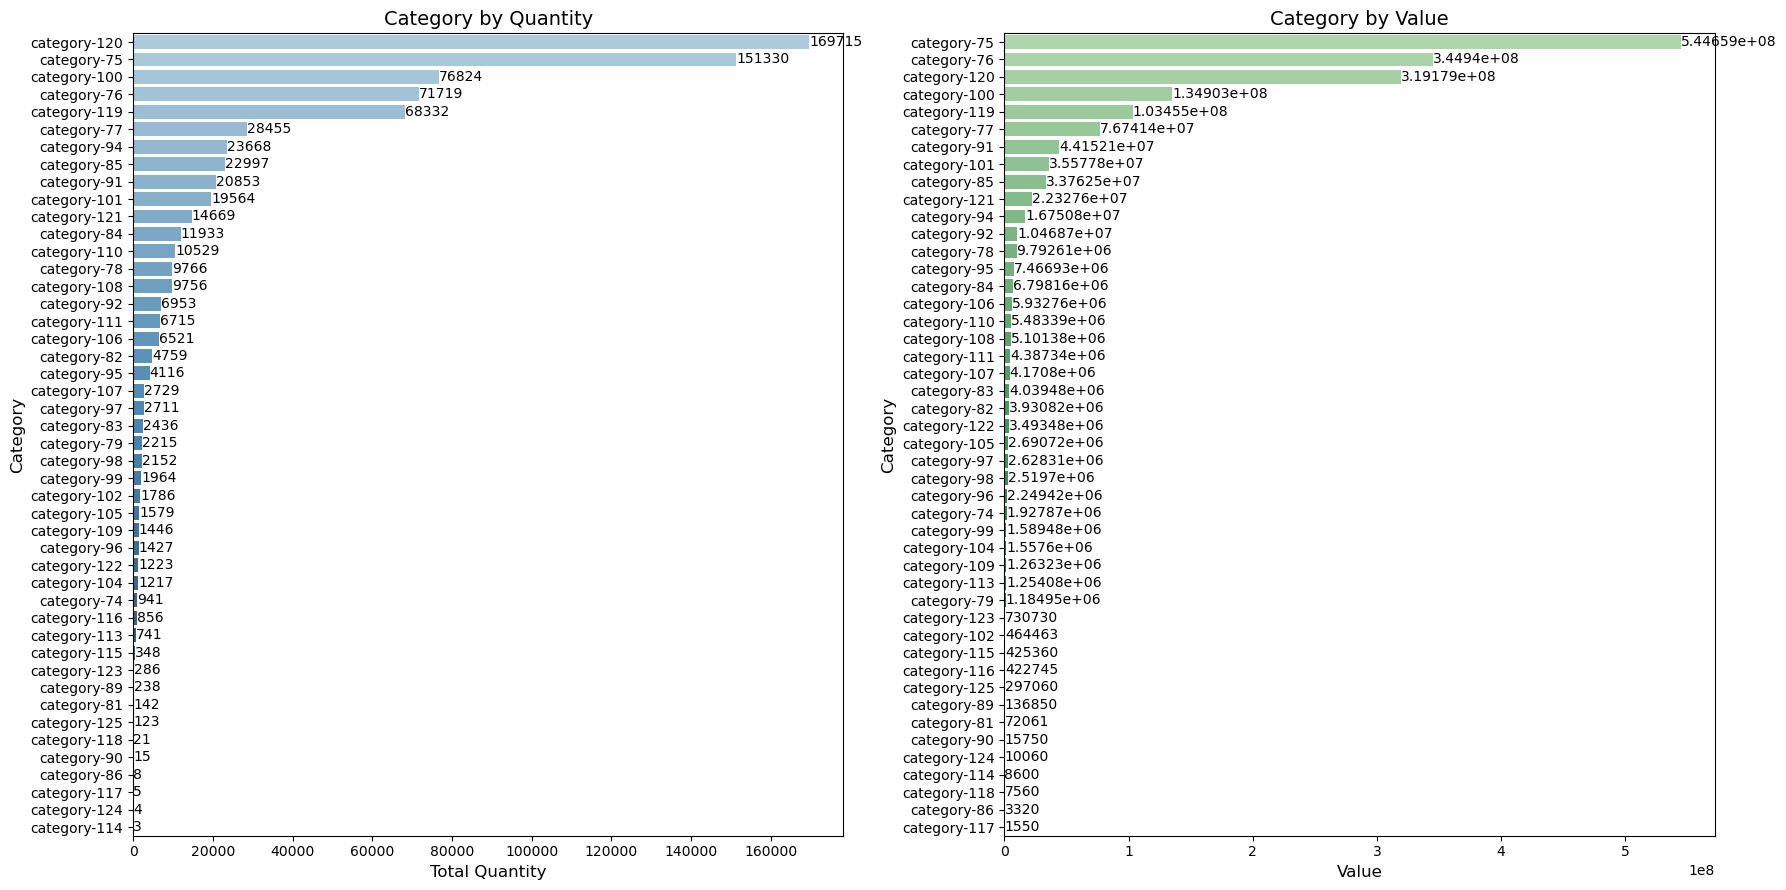

In [ ]:
# Sort category_group by Quantity and Value
category_group_sorted_by_quantity = category_group.sort_values('QUANTITY', ascending=False)
category_group_sorted_by_value = category_group.sort_values('VALUE', ascending=False)

# Plot for Quantity and Value
fig, axes = plt.subplots(1, 2, figsize=(18, 9))

# Plot for Quantity
sns.barplot(data=category_group_sorted_by_quantity, y='ANONYMIZED CATEGORY', x='QUANTITY', ax=axes[0], palette="Blues_d")
axes[0].set_title("Category by Quantity", fontsize=14, weight='bold')
axes[0].set_xlabel("Total Quantity", fontsize=12, weight='bold')
axes[0].set_ylabel("Category", fontsize=12, weight='bold')
axes[0].bar_label(axes[0].containers[0], fontsize=10)

# Plot for Value
sns.barplot(data=category_group_sorted_by_value, y='ANONYMIZED CATEGORY', x='VALUE', ax=axes[1], palette="Greens_d")
axes[1].set_title("Category by Value", fontsize=14, weight='bold')
axes[1].set_xlabel("Value(in millions)", fontsize=12, weight='bold')
axes[1].set_ylabel("Category", fontsize=12, weight='bold')
axes[1].bar_label(axes[1].containers[0], fontsize=10)

plt.tight_layout()
plt.show();

- Business Group

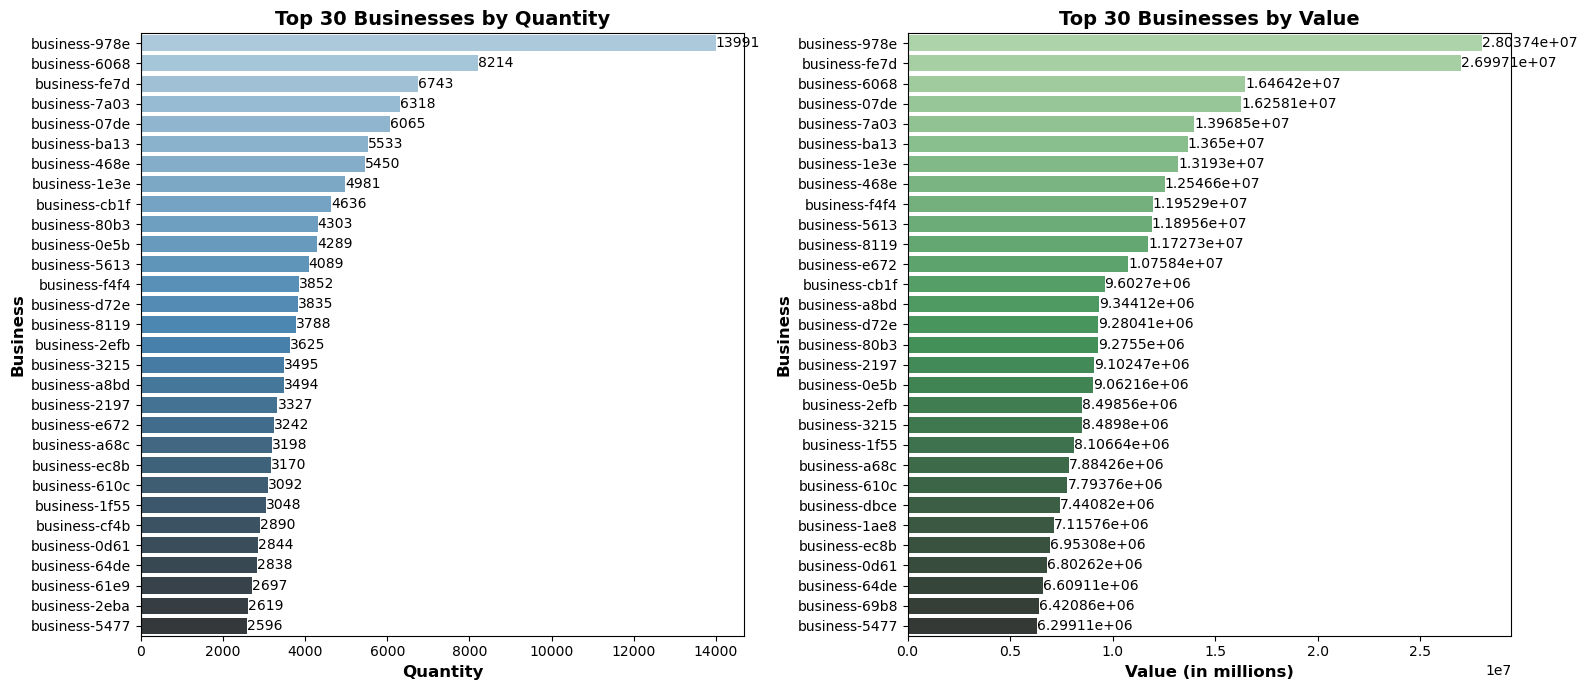

In [43]:
# Sort business_group by Quantity and Value
business_group_sorted_by_quantity = business_group.sort_values('QUANTITY', ascending=False).head(30)
business_group_sorted_by_value = business_group.sort_values('VALUE', ascending=False).head(30)

# Plot for Quantity and Value 
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Plot for Quantity
sns.barplot(data=business_group_sorted_by_quantity, y='ANONYMIZED BUSINESS', x='QUANTITY', ax=axes[0], palette="Blues_d")
axes[0].set_title("Top 30 Businesses by Quantity", fontsize=14, weight='bold')
axes[0].set_xlabel("Quantity", fontsize=12, weight='bold')
axes[0].set_ylabel("Business", fontsize=12, weight='bold')
axes[0].bar_label(axes[0].containers[0], fontsize=10)

# Plot for Value
sns.barplot(data=business_group_sorted_by_value, y='ANONYMIZED BUSINESS', x='VALUE', ax=axes[1], palette="Greens_d")
axes[1].set_title("Top 30 Businesses by Value", fontsize=14, weight='bold')
axes[1].set_xlabel("Value (in millions)", fontsize=12, weight='bold')
axes[1].set_ylabel("Business", fontsize=12, weight='bold')
axes[1].bar_label(axes[1].containers[0], fontsize=10)

plt.tight_layout()
plt.show();

### (b) Trends Over Time

In [44]:
data.sample(5, random_state=42)

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE,Month-Year,VALUE
72578,2024-05-27 13:57:00,category-78,product-b409,business-c96d,location-d32a,1,750.00,May 2024,750.00
59770,2024-04-25 16:36:00,category-75,product-23fd,business-2590,location-0451,1,"4,078.00",April 2024,"4,078.00"
160669,2024-07-16 20:41:00,category-119,product-66e0,business-fe3d,location-1ba8,2,"1,380.00",July 2024,"2,760.00"
123576,2024-10-10 17:20:00,category-119,product-e98d,business-4d9c,location-689f,1,"1,450.00",October 2024,"1,450.00"
90984,2024-10-06 21:54:00,category-76,product-e805,business-bc52,location-3fc0,2,"5,300.00",October 2024,"10,600.00"


steps:
- Group the data by Month-Year and calculate the total Quantity and Value for each month.
- Plot the time series for both Quantity and Value to see seasonal patterns or changes in sales performance.

In [59]:
# Group total Quantity and Value by 'Month-Year column'
monthly_trend = data.groupby('Month-Year').agg(
    {'QUANTITY':'sum',
     'VALUE':'sum'}).reset_index()

# Convert 'Month-Year' to datetime format and sort
monthly_trend['Month-Year'] = pd.to_datetime(monthly_trend['Month-Year'], format='%B %Y')
monthly_trend = monthly_trend.sort_values(by='Month-Year')
monthly_trend.head()

,Month-Year,QUANTITY,VALUE
4,2024-01-01,67526,"185,626,186.00"
3,2024-02-01,44063,"126,579,702.00"
7,2024-03-01,45381,"116,000,676.00"
0,2024-04-01,50554,"122,110,750.00"
8,2024-05-01,69551,"168,781,502.00"


In [60]:
# check the datatypes
monthly_trend.dtypes

Month-Year    datetime64[ns]
QUANTITY               int64
VALUE                float64
dtype: object

**Time series plot**

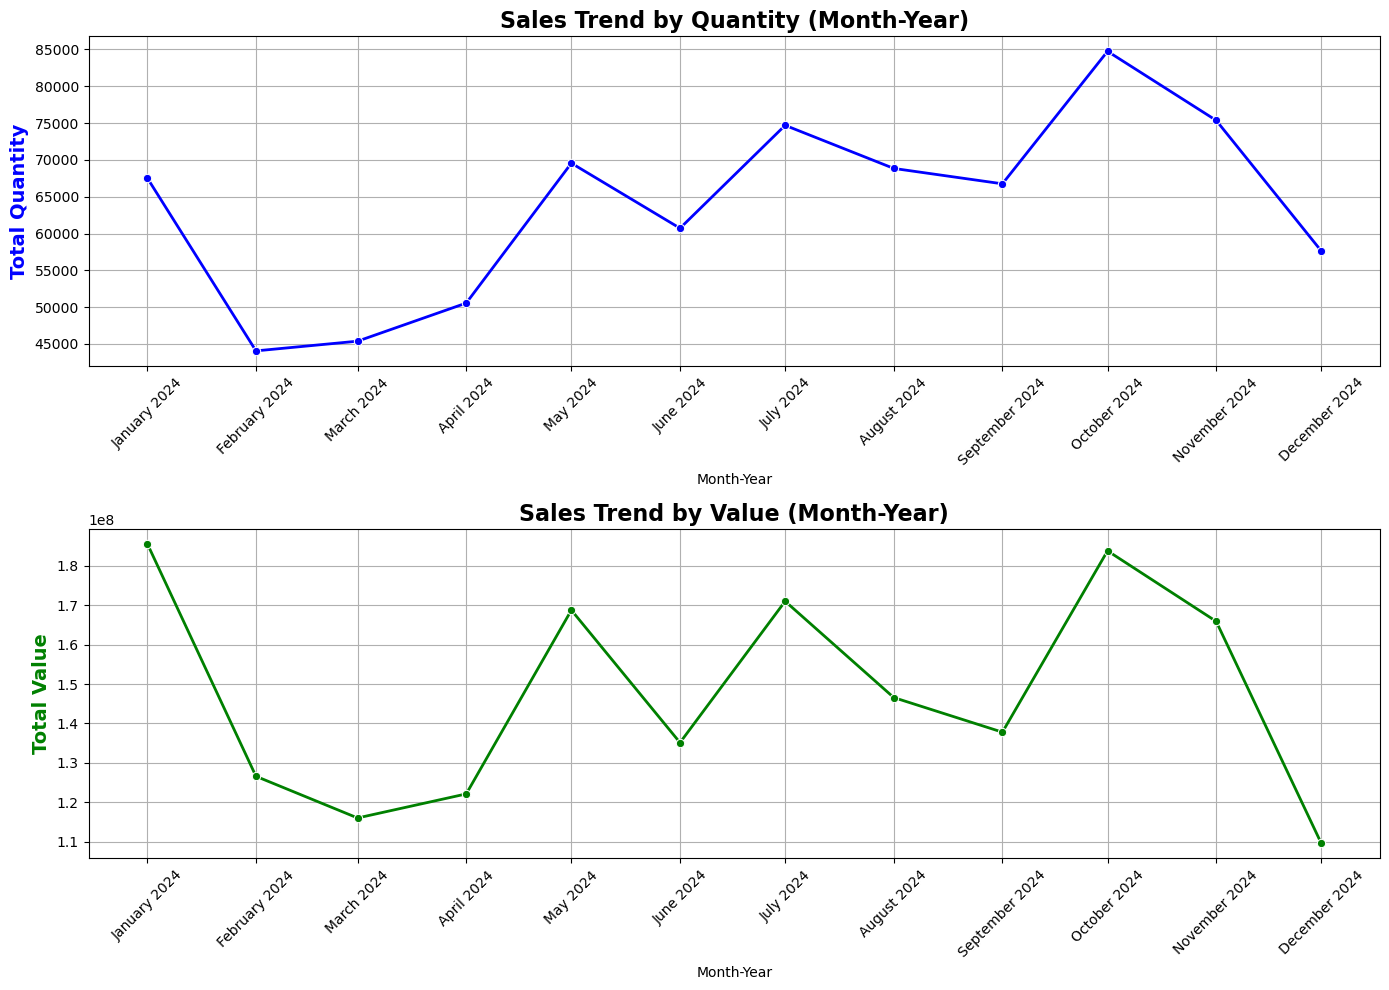

In [73]:
import matplotlib.dates as mdates

# Create the figure
plt.figure(figsize=(14, 10))

# Plot for Quantity
plt.subplot(2, 1, 1)
sns.lineplot(data=monthly_trend, x='Month-Year', y='QUANTITY', marker='o', color='blue', linewidth=2)
plt.title('Sales Trend by Quantity (Month-Year)', fontsize=16, fontweight='bold')
plt.ylabel('Total Quantity', fontsize=14, fontweight='bold', color='blue')
plt.xticks(rotation=45)
plt.grid(True)

# Plot for Value
plt.subplot(2, 1, 2)
sns.lineplot(data=monthly_trend, x='Month-Year', y='VALUE', marker='o', color='green', linewidth=2)
plt.title('Sales Trend by Value (Month-Year)', fontsize=16, fontweight='bold')
plt.ylabel('Total Value', fontsize=14, fontweight='bold', color='green')
plt.xticks(rotation=45)
plt.grid(True)

# Format the x-axis to show the Month names
for ax in plt.gcf().axes:
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%B %Y"))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.tight_layout()
plt.show();

In [76]:
data.head(2)

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE,Month-Year,VALUE
0,2024-08-18 21:32:00,category-106,product-21f4,business-de42,location-1ba8,1,850.00,August 2024,850.00
1,2024-08-18 21:32:00,category-120,product-4156,business-de42,location-1ba8,2,"1,910.00",August 2024,"3,820.00"


### (c) Performance Analysis

**i. Top 5 most frequently purchased products based on Quantity**

In [79]:
top_products = data.groupby('ANONYMIZED PRODUCT').agg({'QUANTITY':'sum'}).reset_index()

# sort 'Quantity' in a descending order
top_5_products = top_products.sort_values('QUANTITY', ascending=False).head(5)

# view the top 5 products
top_5_products

,ANONYMIZED PRODUCT,QUANTITY
338,product-66e0,46957
750,product-e805,42602
476,product-8f75,37566
127,product-29ee,35940
213,product-4156,28487


**ii. Top 5 most valuable products based on Value**

In [82]:
top_valuable_products = data.groupby('ANONYMIZED PRODUCT').agg({'VALUE':'sum'}).reset_index()

# sort 'Value' in a descending order
top_5_valuable_products = top_valuable_products.sort_values('VALUE', ascending=False).head(5)

# view the top 5 Valuable products
top_5_valuable_products

,ANONYMIZED PRODUCT,VALUE
750,product-e805,"262,787,281.00"
476,product-8f75,"158,797,460.00"
338,product-66e0,"70,704,225.00"
127,product-29ee,"68,248,274.00"
213,product-4156,"56,956,007.00"
